Cookie Cats adalah salah satu game di ponsel dengan konsep permainan memnghubungan tiga atau lebih style puzzle yang memiliki bentuk dan warna yang sama untuk memenangkan level. Cookie Cats ini memiliki gate pada permainannya untuk mendorong pemain untuk melakukan pembelian dalam aplikasi. Selain itu, gate ini juga bertujuan untuk memberikan break kepada pemain yang diharapkan dapat meningkatkan dan memperpanjang kesenangan pemain dalam bermain game.

Awalnya gate ini diletakkan pada level 30, tetapi dalam hal ini kita akan melakukan pengujian A/B dimana memindahkan gate pertama dari level 30 ke level 40. Secara khusus, akan dilihat bagaimana retensi pemain terhapa peletakan gate tersebut.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("E:/PROJECT/cookie_cats.csv")

In [3]:
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


* userid - a unique number that identifies each player.
* version - whether the player was put in the control group (gate_30 - a gate at level 30) or the group with the moved gate (gate_40 - a gate at level 40).
* sum_gamerounds - the number of game rounds played by the player during the first 14 days after install.
* retention_1 - did the player come back and play 1 day after installing?
* retention_7 - did the player come back and play 7 days after installing?


In [4]:
df.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


In [5]:
%matplotlib inline

In [6]:
# Menghitung jumlah pemain pada setiap jumlah putaran game yang dimainkan (gamerounds). 
plot_df = df.groupby('sum_gamerounds')['userid'].count()
plot_df.head(10)

sum_gamerounds
0    3994
1    5538
2    4606
3    3958
4    3629
5    2992
6    2861
7    2379
8    2267
9    2013
Name: userid, dtype: int64

Text(0, 0.5, 'Sum Gamerounds')

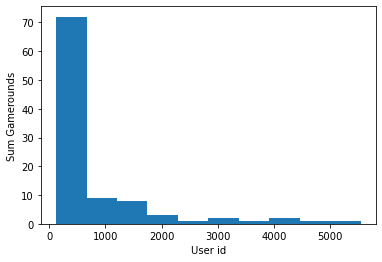

In [7]:
# Plot distribusi pemain yang bermain 0-100 game putaran.
ax = plot_df.head(100).plot(x='sum_gamerounds', y='userid', kind="hist")
ax.set_xlabel("User id")
ax.set_ylabel("Sum Gamerounds")

Berdasarkan plot dapat dilihat bahwa terdapat pemain yang menginstall game tetapi tidak memainkannya kembali (0 game round), pemain hanya bermain sedikitnya dua kali dalam seminggu, dan pemain yang ketagihan akan game ini.

In [8]:
# Persentase pemain yang kembali bermain setelah satu hari menginstall.
df['retention_1'].sum()/df['retention_1'].count()

0.4452095044850259

kurang dari setengah pemain (44%) kembali setelah bermain pada hari pertama. Berikut perbedaan antara group AB.

In [9]:
# Calculating 1-day retention for each AB-group
df.groupby('version')['retention_1'].sum()/df.groupby('version')['retention_1'].count()

version
gate_30    0.448188
gate_40    0.442283
Name: retention_1, dtype: float64

Dengan menghitung persentasi retensi 1 hari setelah penginstall-an, terdapat perbedaan yang cukup kecil antara retensi di gate level 30 dan gate level 40. Retensi pada gate level 30 lebih tinggi dibandingkan retensi gate pada level 40. Walaupun cukup kecil, mungkin hal ini dapat berdampak besar. Untuk menyakinkan kembali apakah gate di level 30 ini lebih baik daripada gate di level 40 akan dilakukan bootstrap untuk mengetahui perbedaan yang lebih jelas.

<AxesSubplot:ylabel='Density'>

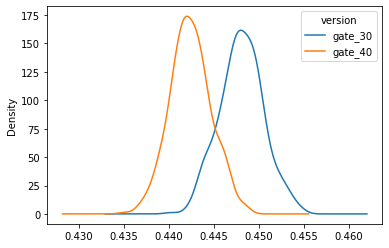

In [10]:
# Creating an list with bootstrapped means for each AB-group
boot_1d = []
for i in range(500):
    boot_mean = df.sample(frac=1, replace=True).groupby('version')['retention_1'].mean()
    boot_1d.append(boot_mean)
    
# Transforming the list to a DataFrame
boot_1d = pd.DataFrame(boot_1d)
    
# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind="kde")

Text(0.5, 0, 'difference')

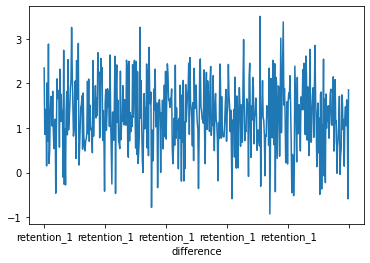

In [11]:
# Adding a column with the % difference between the two AB-groups
boot_1d['diff'] = (boot_1d['gate_30']-boot_1d['gate_40'])/boot_1d['gate_40']*100

# Ploting the bootstrap % difference
ax = boot_1d['diff'].plot()
ax.set_xlabel("difference")

Plot diatas menunjukan perbedaan antara 2 gate yaitu sekitar 1% - 2%, yang hampir seluruhkan di atas 0%. Berikutnya akan ditentukan peluang perbedaan dari kedua gate dengan perbedaan > 0.

In [12]:
# Calculating the probability that 1-day retention is greater when the gate is at level 30
prob = (boot_1d['diff']>0).sum()/len(boot_1d['diff'])

# Pretty printing the probability
print(prob)

0.944


Setelah bermain selama seminggu, lebih banyak pemain yang mencapai level 40. Dengan cara yang sama seperti retensi hari ke-1, akan dihitung berapa % pemain yang menginstall game muncul seminggu kemudian untuk memainkan game lagi. 

In [13]:
# Calculating 7-day retention for both AB-groups
df.groupby('version')['retention_7'].sum()/df.groupby('version')['retention_7'].count()

version
gate_30    0.190201
gate_40    0.182000
Name: retention_7, dtype: float64

Dibandingkan perbedaan retensi antara gate 30 dan gate 40 pada hari ke-1, perbedaan retensi pada AB seminggu setelah menginstall lebih besar. Ini mungkin karena pemain memiliki lebih banyak waktu untuk mencapai gate 30. Namun retensi 7 hari lebih kecil dari retensi 1 hari, lebih sedikit orang yang bermain game seminggu setelah menginstall daripada sehari setelahnya. 

0.998


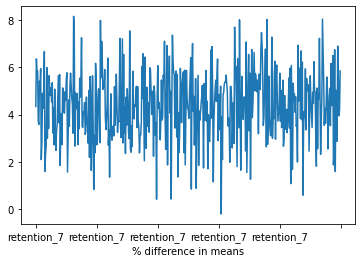

In [14]:
# Creating a list with bootstrapped means for each AB-group
boot_7d = []
for i in range(500):
    boot_mean = df.sample(frac=1, replace=True).groupby('version')['retention_7'].mean()
    boot_7d.append(boot_mean)
    
# Transforming the list to a DataFrame
boot_7d = pd.DataFrame(boot_7d)

# Adding a column with the % difference between the two AB-groups
boot_7d['diff'] = (boot_7d['gate_30']-boot_7d['gate_40'])/boot_7d['gate_40']*100

# Ploting the bootstrap % difference
ax = boot_7d['diff'].plot()
ax.set_xlabel("% difference in means")

# Calculating the probability that 7-day retention is greater when the gate is at level 30
prob = (boot_7d['diff']>0).sum()/len(boot_7d['diff'])

# Pretty printing the probability
print(prob)

Kesimpulan:
* Jika ingin mempertahankan retensi yang tinggi, sebaiknya jangan memindahkan gate dari level 30 ke level 40. Mungkin retensi bukanlah satu-satunya tolak ukur, tetapi retensi adalah salah satu tolak ukur yang paling penting.
* Penyebab retensi lebih tinggi ketika diletakkan di gate awal (gate 30) dapat dikaitkan dengan teori hedonis yaitu jika aktivitas menyenangkan dilakukan terus menerus kecendrungan orang untuk mendapatkan kesenangan semakin berkurang dari waktu ke waktu. Dengan memaksa pemain break ketika mencapai gate lebih awal, kesenangan mereka diperpanjang. tetapi ketika dipindahkan ke level 40, lebih sedikit pemain yang berhasil mencapai jarak yang cukup jauh dan mereka cenderung keluar dari permainan.